In [60]:
! wget https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py -O setup_google_colab.py

--2020-04-10 11:05:32--  https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1991 (1.9K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.94K  --.-KB/s    in 0s      

2020-04-10 11:05:32 (34.9 MB/s) - ‘setup_google_colab.py’ saved [1991/1991]



In [61]:
! wget https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py -O setup_google_colab.py

--2020-04-10 11:05:44--  https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1991 (1.9K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.94K  --.-KB/s    in 0s      

2020-04-10 11:05:44 (33.5 MB/s) - ‘setup_google_colab.py’ saved [1991/1991]



In [0]:
import setup_google_colab

In [0]:
setup_google_colab.setup_week1() 

In [287]:
import sys
sys.path.append("..")
from common.download_utils import download_week1_resources

download_week1_resources()

File data/train.tsv is already downloaded.
File data/validation.tsv is already downloaded.
File data/test.tsv is already downloaded.
File data/text_prepare_tests.tsv is already downloaded.


In [0]:
from grader import Grader

In [0]:
grader = Grader()

In [0]:
#text preprocessing

In [291]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [0]:
def read_data(filename):
  data=pd.read_csv(filename,sep='\t')
  data['tags']=data['tags'].apply(literal_eval)
  return data

In [0]:
train=read_data('data/train.tsv')
validation=read_data('data/validation.tsv')
test = pd.read_csv('data/test.tsv', sep='\t')

In [360]:
validation.columns

Index(['title', 'tags'], dtype='object')

In [0]:
X_train,y_train=train['title'].values,train['tags'].values
X_val,y_val=validation['title'].values,validation['tags'].values
X_test=test['title'].values

In [362]:
type(stopwords)

nltk.corpus.reader.wordlist.WordListCorpusReader

In [364]:
print(y_train[0])

['r']


In [0]:
import re

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [0]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [0]:
def test_text_prepare():

  examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
  answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
  for ex,ans in zip(examples,answers):
    if text_prepare(ex)!=ans:
      print(text_prepare(ex))
      return "Wrong answer for the case: '%s'"%ex
  return 'Basic tests are passed'   

In [305]:
print(test_text_prepare())

Basic tests are passed


In [306]:
prepared_questions=[]
for line in open('data/text_prepare_tests.tsv',encoding='utf_8'):
  line=text_prepare(line.strip())
  prepared_questions.append(line)
text_prepare_results='\n'.join(prepared_questions)
grader.submit_tag('TextPrepare',text_prepare_results)

Current answer for task TextPrepare is:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...


In [0]:
X_train=[text_prepare(x) for x in X_train]
X_val=[text_prepare(x) for x in X_val]
X_test=[text_prepare(x) for x in X_test]

In [327]:
new_text=[text.split(' ') for text in X_train[:3]]
print(new_text)

[['draw', 'stacked', 'dotplot', 'r'], ['mysql', 'select', 'records', 'datetime', 'field', 'less', 'specified', 'value'], ['terminate', 'windows', 'phone', '81', 'app']]


In [328]:
import operator
tags_count={}
words_count={}
for tags in y_train:
  for tag in tags:
    if tag not in tags_count:
      tags_count[tag]=1
    else:
      tags_count[tag]+=1 
sorted_t = sorted(tags_count.items(), key=operator.itemgetter(1),reverse=True)
top_3t=list()
for tup in sorted_t[:3]:
  top_3t.append(tup[0])
print(top_3t[0],',',top_3t[1],',',top_3t[2],sep='')


new_X_train=[text.split(' ') for text in X_train]
for text in new_X_train:
  for word in text:
    if word not in words_count:
      words_count[word]=1
    else:
      words_count[word]+=1 
import operator
sorted_d = sorted(words_count.items(), key=operator.itemgetter(1),reverse=True)
top_3=list()
for tup in sorted_d[:3]:
  top_3.append(tup[0])
print(top_3[0],',',top_3[1],',',top_3[2],sep='')

javascript,c#,java
using,php,java


In [0]:
top_3_word=','.join(top_3)
top_3_tag=','.join(top_3t)

In [0]:
final=top_3_tag+'\n'+top_3_word

In [331]:
#print(final)
grader.submit_tag('WordsTagsCount',final)

Current answer for task WordsTagsCount is:
 javascript,c#,java
using,php,java...


In [0]:
def word2index(arr):
  dict1={}
  i=0
  for ele in arr:
    dict1[ele[0]]=i
    i+=1
    if i==5000:
      return dict1
  return dict1
def index2word(arr):
  dict1={}
  i=0
  for ele in arr:
    dict1[i]=ele[0]
    i+=1
    if i==5000:
      return dict1
  return dict1
   

In [0]:

#transforming text to vectore
DICT_SIZE=5000
WORDS_TO_INDEX=word2index(sorted_d)
INDEX_TO_WORDS=index2word(sorted_d)
ALL_WORDS=WORDS_TO_INDEX.keys()

In [0]:
def my_bag_of_words(text,words_to_index,dict_size):
  dim=np.zeros(dict_size)
  text=text.split(' ')
  #print(text)
  for word in text:
    if word in words_to_index:
      #print(word)
      dim[words_to_index[word]]+=1
  return dim

In [0]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [336]:
print(test_my_bag_of_words())

Basic tests are passed.


In [0]:
from scipy import sparse as sp_sparse

In [338]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (100000, 5000)
X_val shape  (30000, 5000)
X_test shape  (20000, 5000)


In [339]:
row=X_train_mybag[10].toarray()[0]
non_zero_elements_count=np.count_nonzero(row)
grader.submit_tag('BagOfWords', str(non_zero_elements_count))

Current answer for task BagOfWords is:
 7...


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
def tfidf_features(X_train, X_val, X_test):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5, token_pattern='(\S+)') ####### YOUR CODE HERE #######
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    return X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vectorizer.vocabulary_

In [0]:
X_train_idf,X_val_idf,X_test_idf,tfidf_vocab=tfidf_features(X_train,X_val,X_test)
tfidf_reversed_vocab={i:word for word,i in tfidf_vocab.items()}

In [347]:
#X_val_idf.shape
X_train_idf.shape

(100000, 18300)

In [0]:
#Multilabel Classifier
from sklearn.preprocessing import MultiLabelBinarizer

In [349]:
classes=list(tags_count.keys())
print(len(classes))

100


In [355]:
print(sorted(tags_count.keys()))

['.net', 'ajax', 'algorithm', 'android', 'angularjs', 'apache', 'arrays', 'asp.net', 'asp.net-mvc', 'c', 'c#', 'c++', 'class', 'cocoa-touch', 'codeigniter', 'css', 'csv', 'database', 'date', 'datetime', 'django', 'dom', 'eclipse', 'entity-framework', 'excel', 'facebook', 'file', 'forms', 'function', 'generics', 'google-maps', 'hibernate', 'html', 'html5', 'image', 'ios', 'iphone', 'java', 'javascript', 'jquery', 'json', 'jsp', 'laravel', 'linq', 'linux', 'list', 'loops', 'maven', 'mongodb', 'multithreading', 'mysql', 'node.js', 'numpy', 'objective-c', 'oop', 'opencv', 'osx', 'pandas', 'parsing', 'performance', 'php', 'pointers', 'python', 'python-2.7', 'python-3.x', 'qt', 'r', 'regex', 'rest', 'ruby', 'ruby-on-rails', 'ruby-on-rails-3', 'selenium', 'servlets', 'session', 'sockets', 'sorting', 'spring', 'spring-mvc', 'sql', 'sql-server', 'string', 'swift', 'swing', 'twitter-bootstrap', 'uitableview', 'unit-testing', 'validation', 'vb.net', 'visual-studio', 'visual-studio-2010', 'wcf', '

In [0]:
ty_val=y_val
ty_train=y_train
tagg=tags_count
tagkey=sorted(tagg.keys())

In [0]:
mlb=MultiLabelBinarizer()
mlb.fit(tagkey)
y_train=mlb.fit_transform(ty_train)
y_val=mlb.fit_transform(ty_val)

In [407]:
print(mlb.classes_)

['.net' 'ajax' 'algorithm' 'android' 'angularjs' 'apache' 'arrays'
 'asp.net' 'asp.net-mvc' 'c' 'c#' 'c++' 'class' 'cocoa-touch'
 'codeigniter' 'css' 'csv' 'database' 'date' 'datetime' 'django' 'dom'
 'eclipse' 'entity-framework' 'excel' 'facebook' 'file' 'forms' 'function'
 'generics' 'google-maps' 'hibernate' 'html' 'html5' 'image' 'ios'
 'iphone' 'java' 'javascript' 'jquery' 'json' 'jsp' 'laravel' 'linq'
 'linux' 'list' 'loops' 'maven' 'mongodb' 'multithreading' 'mysql'
 'node.js' 'numpy' 'objective-c' 'oop' 'opencv' 'osx' 'pandas' 'parsing'
 'performance' 'php' 'pointers' 'python' 'python-2.7' 'python-3.x' 'qt'
 'r' 'regex' 'rest' 'ruby' 'ruby-on-rails' 'ruby-on-rails-3' 'selenium'
 'servlets' 'session' 'sockets' 'sorting' 'spring' 'spring-mvc' 'sql'
 'sql-server' 'string' 'swift' 'swing' 'twitter-bootstrap' 'uitableview'
 'unit-testing' 'validation' 'vb.net' 'visual-studio' 'visual-studio-2010'
 'wcf' 'web-services' 'windows' 'winforms' 'wordpress' 'wpf' 'xaml'
 'xcode' 'xml']


In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier

In [0]:
def train_classifier(X_train,y_train):
  model=OneVsRestClassifier(LogisticRegression(penalty='l2',C=1.0,max_iter=50))
  model.fit(X_train,y_train)
  return model

In [0]:
classifier_mybag=train_classifier(X_train_mybag,y_train)
classifier_tfidf=train_classifier(X_train_idf,y_train)

In [379]:
X_val_idf.shape

(30000, 18300)

In [0]:


y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_idf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_idf)



In [381]:
print(y_val_predicted_labels_mybag[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [383]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(3,9):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	Sessions in Sinatra: Used to Pass Variable
True labels:	ruby,session
Predicted labels:	


Title:	Getting error - type "json" does not exist - in Postgresql during rake db migrate
True labels:	json,ruby,ruby-on-rails
Predicted labels:	ruby-on-rails


Title:	library not found for.....?
True labels:	c++,ios,iphone,xcode
Predicted labels:	


Title:	.csproj File - Programmatic adding/deleting files
True labels:	c#
Predicted labels:	


Title:	TypeError: makedirs() got an unexpected keyword argument 'exists_ok'
True labels:	django,python
Predicted labels:	python


Title:	How to Pan a div using JQuery
True labels:	html,javascript,jquery
Predicted labels:	javascript,jquery




In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [0]:
def print_evaluation_scores(y_val, predicted):
    print ("Accracy={}".format(accuracy_score(y_val, predicted)), 
        "F1_macro={}".format(f1_score(y_val, predicted, average='macro')),
        "F1_micro={}".format(f1_score(y_val, predicted, average='micro')),
        "F1_wted={}".format(f1_score(y_val, predicted, average='weighted')),
        "Precsion_macro={}".format(average_precision_score(y_val, predicted, average='macro')),
        "Precsion_micro={}".format(average_precision_score(y_val, predicted, average='micro')),
        "Precsion_wted={}".format(average_precision_score(y_val, predicted, average='weighted')))

In [388]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)



Bag-of-words
Accracy=0.35763333333333336 F1_macro=0.5048808602818221 F1_micro=0.670977130977131 F1_wted=0.6486705688023899 Precsion_macro=0.3444225859910309 Precsion_micro=0.48107949132298516 Precsion_wted=0.5106912824283614
Tfidf
Accracy=0.3338333333333333 F1_macro=0.44536531538314733 F1_micro=0.6414243167484233 F1_wted=0.6139737649279764 Precsion_macro=0.3016800881135674 Precsion_micro=0.45652289160192683 Precsion_wted=0.48462523022014437


In [0]:
from metrics import roc_auc
%matplotlib inline

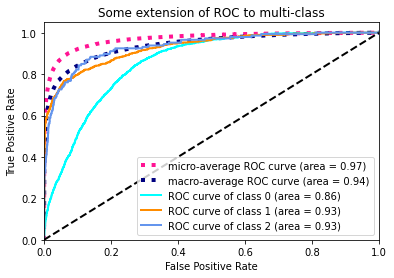

In [396]:
n_classes = len(tags_count)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

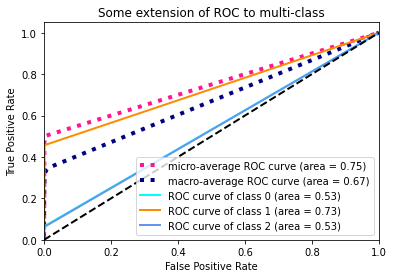

In [397]:
roc_auc(y_val,y_val_predicted_labels_tfidf,n_classes)

In [0]:
test_predictions=classifier_mybag.predict(X_test_mybag)
test_pred_inversed=mlb.inverse_transform(test_predictions)
test_predictions_for_submission = '\n'.join('%i\t%s' % (i, ','.join(row)) for i, row in enumerate(test_pred_inversed))

In [401]:
grader.submit_tag('MultilabelClassification', test_predictions_for_submission)

Current answer for task MultilabelClassification is:
 0	mysql,php
1	javascript
2	
3	javascript,jquery
4	android,java
5	php,xml
6	ajax,json,web-services
7	...


In [0]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    print('Tag:\t{}'.format(tag))
    estimator1 = classifier.estimators_[tags_classes.index(tag)]
    coff = estimator1.coef_[0]
    coff_idx = list(enumerate(coff))
    top_pos_words_idx = [idx for idx, wt in sorted(coff_idx, key=lambda x: x[1], reverse=True)[:5]]
    top_neg_words_idx = [idx for idx, wt in sorted(coff_idx, key=lambda x: x[1], reverse=False)[:5]]
    top_positive_words = [index_to_words[idx] for idx in top_pos_words_idx] # top-5 words sorted by the coefficiens.
    top_negative_words = [index_to_words[idx] for idx in top_neg_words_idx] # bottom-5 words  sorted by the coefficients.
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

In [0]:
mlbclasses_=list(mlb.classes_)

In [411]:
print(ar.index('ajax'))

1


In [414]:
print_words_for_tag(classifier_tfidf, 'c', mlbclasses_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'c++', mlbclasses_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'linux', mlbclasses_, tfidf_reversed_vocab, ALL_WORDS)

Tag:	c
Top positive words:	c, malloc, scanf, printf, gcc
Top negative words:	java, php, python, javascript, c#

Tag:	c++
Top positive words:	c++, qt, boost, mfc, opencv
Top negative words:	java, php, python, javascript, c#

Tag:	linux
Top positive words:	linux, ubuntu, c, address, signal
Top negative words:	javascript, c#, jquery, array, method



In [415]:
grader.status()

You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...
Task WordsTagsCount:
 javascript,c#,java
using,php,java...
Task BagOfWords:
 7...
Task MultilabelClassification:
 0	mysql,php
1	javascript
2	
3	javascript,jquery
4	android,java
5	php,xml
6	ajax,json,web-services
7	...


In [416]:
STUDENT_EMAIL='anubhav.singh0814@gmail.com'
STUDENT_TOKEN='omjvIK0XGTXCSZWi'
grader.status()

You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...
Task WordsTagsCount:
 javascript,c#,java
using,php,java...
Task BagOfWords:
 7...
Task MultilabelClassification:
 0	mysql,php
1	javascript
2	
3	javascript,jquery
4	android,java
5	php,xml
6	ajax,json,web-services
7	...


In [417]:
grader.submit(STUDENT_EMAIL,STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
